In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [16]:
df=pd.read_csv('agri.csv')

In [17]:
df.head()

,Crop,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
0,ARHAR,9794.05,23076.74,1941.55,9.83
1,ARHAR,10593.15,16528.68,2172.46,7.47
2,ARHAR,13468.82,19551.90,1898.30,9.59
3,ARHAR,17051.66,24171.65,3670.54,6.42
4,ARHAR,17130.55,25270.26,2775.80,8.72


In [18]:
df.dtypes

Crop                                      object
Cost of Cultivation (`/Hectare) A2+FL    float64
Cost of Cultivation (`/Hectare) C2       float64
Cost of Production (`/Quintal) C2        float64
Yield (Quintal/ Hectare)                 float64
dtype: object

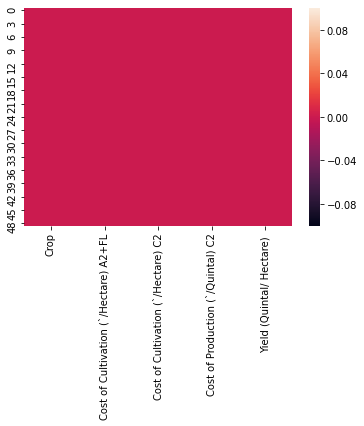

In [19]:
#To detect null values
sns.heatmap(df.isnull())

In [20]:
df['Crop'].unique() #10 types of crop

array(['ARHAR', 'COTTON', 'GRAM', 'GROUNDNUT', 'MAIZE', 'MOONG', 'PADDY',
       'RAPESEED AND MUSTARD', 'SUGARCANE', 'WHEAT'], dtype=object)

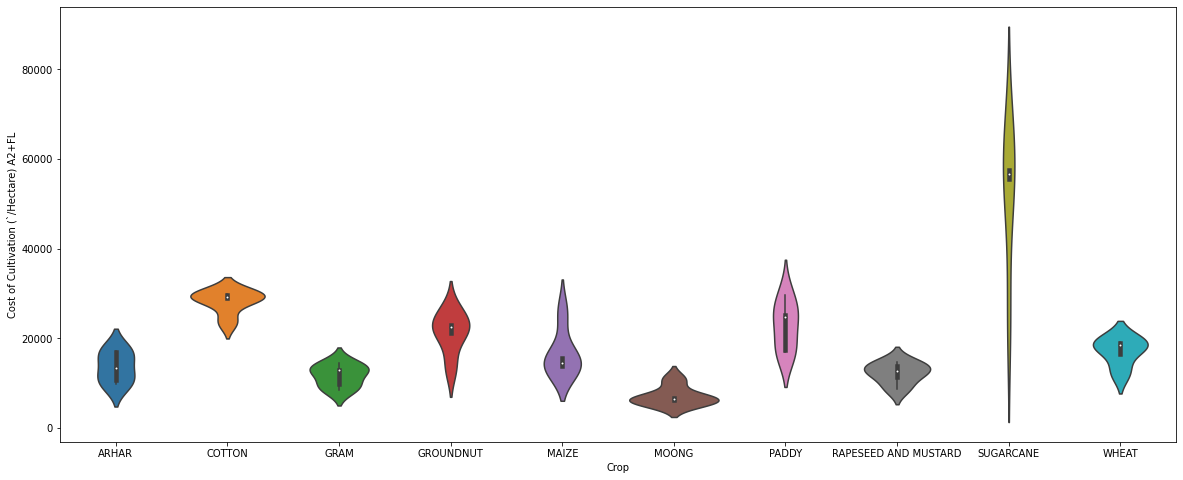

In [32]:
#violinplot for crop vs cost for cultivation
plt.figure(figsize=(20,8))
sns.violinplot(df['Crop'],df['Cost of Cultivation (`/Hectare) A2+FL'],data=df)

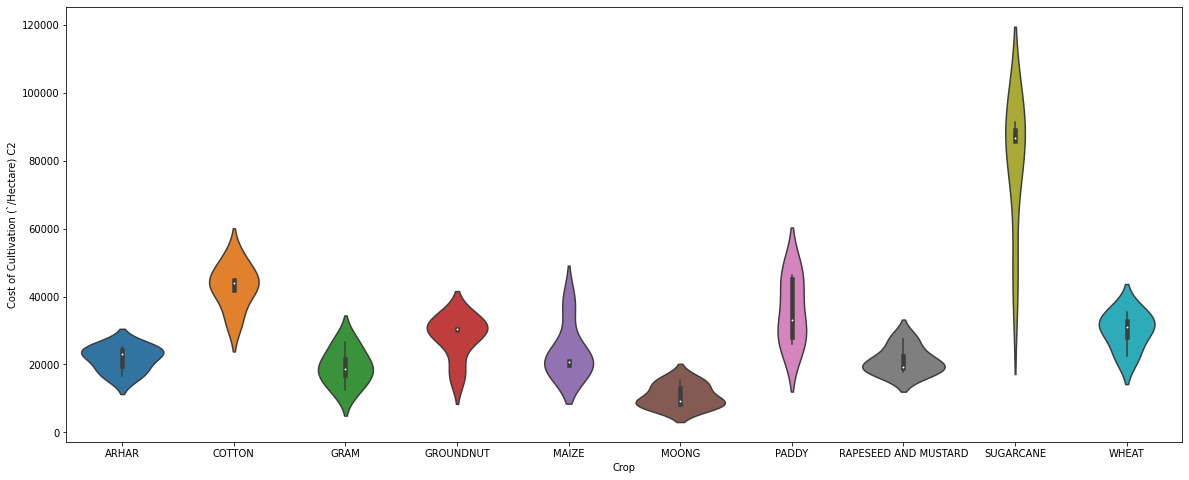

In [35]:
#violinplot for crop vs cost for cultivation (additional)
plt.figure(figsize=(20,8))
sns.violinplot(df['Crop'],df['Cost of Cultivation (`/Hectare) C2'],data=df)

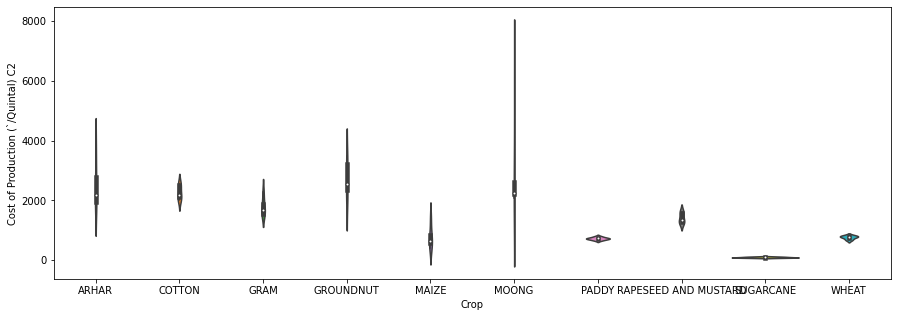

In [39]:
#violinplot for crop vs cost for Production
plt.figure(figsize=(15,5))
sns.violinplot(df['Crop'],df['Cost of Production (`/Quintal) C2'],data=df)

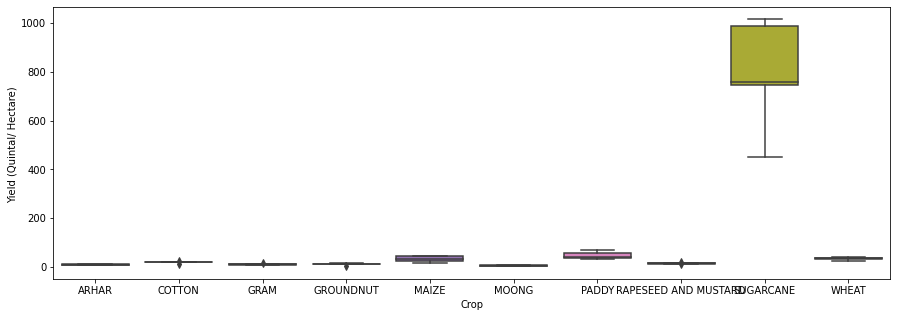

In [44]:
#violinplot for crop vs cost for Toal yield
plt.figure(figsize=(15,5))
sns.boxplot(df['Crop'],df['Yield (Quintal/ Hectare) '],data=df)

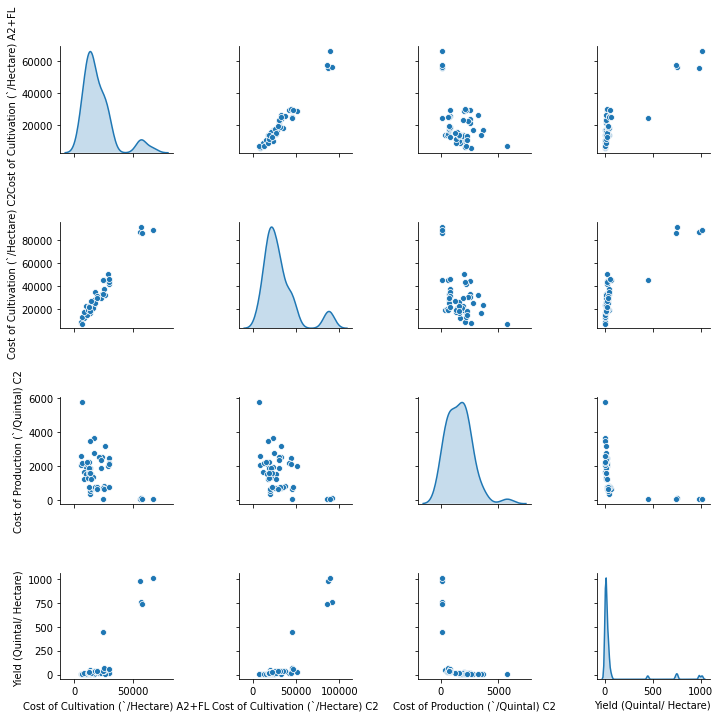

In [47]:
sns.pairplot(df,diag_kind='kde')

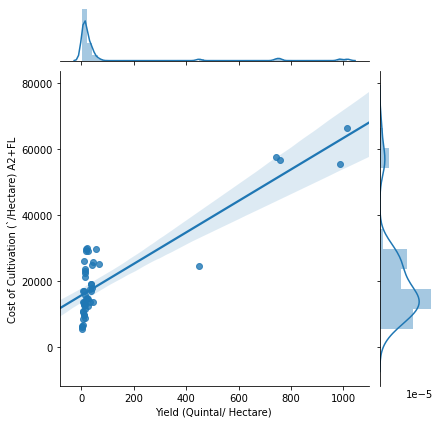

In [58]:
#joinplot with respect to yields
sns.jointplot(x=df['Yield (Quintal/ Hectare) '],y=df['Cost of Cultivation (`/Hectare) A2+FL'],data=df,kind='reg')

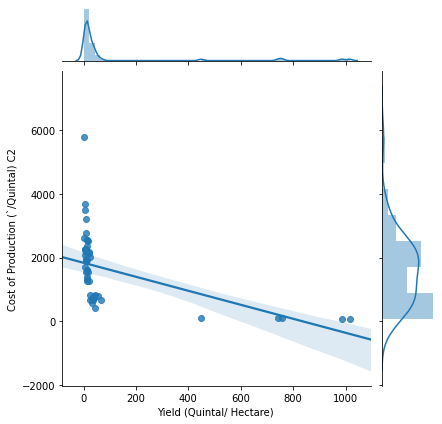

In [59]:
#joinplot with respect to yields
sns.jointplot(x=df['Yield (Quintal/ Hectare) '],y=df['Cost of Production (`/Quintal) C2'],data=df,kind='reg')

In [60]:
#creating the key values
df['Crop'].replace({'ARHAR':1,'COTTON':2,'GRAM':3,'GROUNDNUT':4,'MAIZE':5,'MOONG':6,'PADDY':7,'RAPESEED AND MUSTARD':8,'SUGARCANE':9,'WHEAT':10},inplace=True)

In [65]:
df.drop('yield',axis=1,inplace=True)

In [66]:
df.head() #after changing

,Crop,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
0,1,9794.05,23076.74,1941.55,9.83
1,1,10593.15,16528.68,2172.46,7.47
2,1,13468.82,19551.90,1898.30,9.59
3,1,17051.66,24171.65,3670.54,6.42
4,1,17130.55,25270.26,2775.80,8.72


In [67]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split

In [ ]:
outliers

In [68]:
x=df.drop('Yield (Quintal/ Hectare) ',axis=1)
y=df[['Yield (Quintal/ Hectare) ']]

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=4,test_size=0.3)

In [70]:
lr=LinearRegression()

In [71]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
lr.predict(x_test)

array([[ 257.5515357 ],
       [ 169.00153501],
       [ -88.67109264],
       [ -13.07446938],
       [ -35.77840832],
       [  70.11482553],
       [ 209.54425399],
       [-129.85931059],
       [  65.16961675],
       [  89.14975791],
       [ -21.48809478],
       [ -85.65694405],
       [ 261.57342411],
       [ -47.12397554],
       [  87.87019846]])

In [76]:
lr.score(x_train,y_train)

0.8412955293190294

In [77]:
#ridge regression
ridge=Ridge(alpha=.20)
ridge.fit(x_train,y_train)
ridge.predict(x_test)

array([[ 257.61627785],
       [ 168.94964418],
       [ -88.6357269 ],
       [ -13.02742153],
       [ -35.74586434],
       [  70.10188333],
       [ 209.59001382],
       [-129.8924409 ],
       [  65.11382322],
       [  89.1603872 ],
       [ -21.47422507],
       [ -85.67775757],
       [ 261.58018841],
       [ -47.14064491],
       [  87.87542725]])

In [79]:
ridge.score(x_test,y_test)

-52.778556021303764

In [80]:
lasso=Lasso(alpha=0.2)
lasso.fit(x_train,y_train)
lasso.predict(x_test)
lasso.score(x_test,y_test)

-52.790989848891044